In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install joypy

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import json

f = open('rankings.json', 'r')

original_data = json.load(f)
f.close()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy

In [4]:

import scipy.stats as stats

def norm(mu, sigma, n = 1000):
  a = mu - 3*sigma
  b = mu + 3*sigma
  dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
  return dist.rvs(n)

In [5]:
# created the basic data structure that will be plotted

data = []
for i in range(len(original_data)):
  d = original_data[i]
  n = 100000
  values = norm(d['mu'], d['sigma'], n)  
  font = str(i+1).zfill(2) + '. ' + d['font']
  for j in range(n):
    data.append([font, values[j]])
  
df = pd.DataFrame(data, columns=['Font', 'Value'])
print(df)

                   Font      Value
0       01. Baskerville  26.368627
1       01. Baskerville  24.493978
2       01. Baskerville  24.527292
3       01. Baskerville  25.689359
4       01. Baskerville  25.293092
5       01. Baskerville  26.049657
6       01. Baskerville  24.692910
7       01. Baskerville  24.112436
8       01. Baskerville  25.342423
9       01. Baskerville  25.816703
10      01. Baskerville  25.367741
11      01. Baskerville  24.772479
12      01. Baskerville  25.280785
13      01. Baskerville  24.890665
14      01. Baskerville  24.297948
15      01. Baskerville  24.631941
16      01. Baskerville  25.083947
17      01. Baskerville  25.074825
18      01. Baskerville  25.476872
19      01. Baskerville  24.799385
20      01. Baskerville  26.854114
21      01. Baskerville  24.713070
22      01. Baskerville  25.387171
23      01. Baskerville  23.262182
24      01. Baskerville  27.225025
25      01. Baskerville  25.725067
26      01. Baskerville  24.882892
27      01. Baskervi

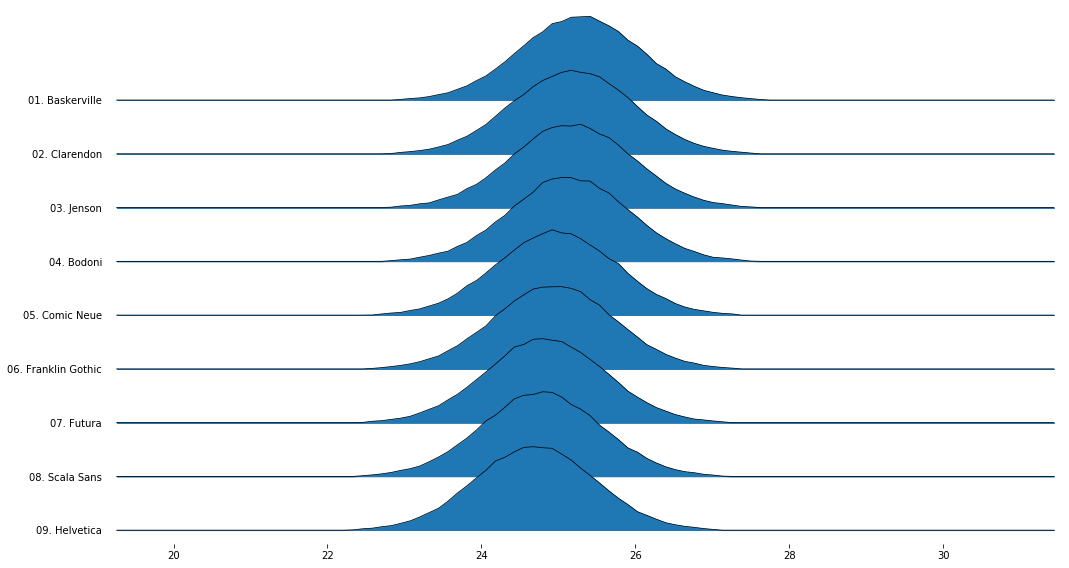

In [6]:
%matplotlib inline

from matplotlib import cm

fig, axes = joypy.joyplot(df, by="Font", 
                          grid=False, linewidth=0.75, x_range=[19.2,31.5],
                          legend=False, overlap=1, figsize=(15,8), kind="counts", bins=100)

fig.savefig("rank_general.svg")
